<a href="https://colab.research.google.com/github/ag-akanksha/Netflix-Movies-and-TV-Shows-Clustering/blob/main/AA1_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.shape

(7787, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.dtypes.value_counts()

object    11
int64      1
dtype: int64

In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['country'].fillna('No Country', inplace=True)
df['rating'].fillna('No rating', inplace=True)

In [ ]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [ ]:
df.type.value_counts(normalize=True)

Movie      0.69051
TV Show    0.30949
Name: type, dtype: float64

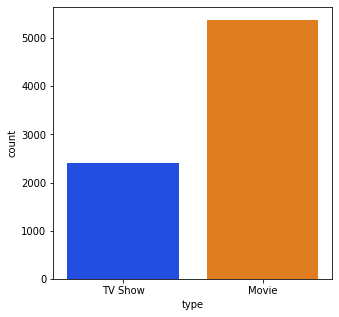

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(df.type,ax=ax, palette='bright')

In [ ]:
movies_df = df[df['type']=='Movie'].copy()
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [ ]:
shows_df = df[df['type']=='TV Show'].copy()
shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",No Country,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [ ]:
df.director.value_counts().head(10)

No Director               2389
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Steven Spielberg            10
David Dhawan                 9
Name: director, dtype: int64

In [ ]:
dir_list=[]

for dir in df.director:
  dir_list.append(dir.split(','))

In [ ]:
dir_list

[['No Director'],
 ['Jorge Michel Grau'],
 ['Gilbert Chan'],
 ['Shane Acker'],
 ['Robert Luketic'],
 ['Serdar Akar'],
 ['Yasir Al Yasiri'],
 ['Kevin Reynolds'],
 ['Shravan Kumar'],
 ['Vikram Bhatt'],
 ['Zak Hilditch'],
 ['No Director'],
 ['Diego Enrique Osorno'],
 ['Nottapon Boonprakob'],
 ['John Suits'],
 ['Kunle Afolayan'],
 ['No Director'],
 ['Paul Greengrass'],
 ['Swapnaneel Jayakar'],
 ['No Director'],
 ['Onir'],
 ['Vijay Milton'],
 ['Santwana Bardoloi'],
 ['Atanu Ghosh'],
 ['No Director'],
 ['Lyric R. Cabral', ' David Felix Sutcliffe'],
 ['No Director'],
 ['Cho Il'],
 ['Sabina Fedeli', ' Anna Migotto'],
 ['No Director'],
 ['Michael Margolis'],
 ['Rako Prijanto'],
 ['Rako Prijanto'],
 ['Fernando Lebrija'],
 ['Michael Kennedy'],
 ['Robert McCullough Jr.'],
 ['Cristina Jacob'],
 ['Cristina Jacob'],
 ['No Director'],
 ['Frank Ariza'],
 ['Muharrem Gülmez'],
 ['Óskar Thór Axelsson'],
 ['Ozan Açıktan'],
 ['Kenneth Gyang'],
 ['Karyn Kusama'],
 ['No Director'],
 ['Adam Deyoe'],
 ['Leif Ti

In [ ]:
df.cast.value_counts().head(10)

No Cast                                                                                                                   718
David Attenborough                                                                                                         18
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Craig Sechler                                                                                                               6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
Kevin Hart                                                                                                                  6
Jim Gaffigan                                                                                                          

In [ ]:
df.country.value_counts().head(10)

United States     2555
India              923
No Country         507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64

In [ ]:
df.duration.value_counts().head(15)

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
94 min        125
91 min        125
95 min        119
92 min        118
97 min        117
96 min        115
98 min        106
103 min       101
99 min        101
88 min        101
Name: duration, dtype: int64

In [ ]:
movies_df.duration = movies_df.duration.str.replace(' min','').astype(int)
shows_df.rename(columns={'duration':'seasons'}, inplace=True)
shows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
shows_df.seasons = shows_df.seasons.str.replace(' Seasons','').astype(int)

In [ ]:
df.listed_in.value_counts().head(25)

Documentaries                                           334
Stand-Up Comedy                                         321
Dramas, International Movies                            320
Comedies, Dramas, International Movies                  243
Dramas, Independent Movies, International Movies        215
Kids' TV                                                205
Children & Family Movies                                177
Documentaries, International Movies                     172
Children & Family Movies, Comedies                      169
Comedies, International Movies                          161
Dramas, International Movies, Romantic Movies           153
Comedies, International Movies, Romantic Movies         139
Dramas                                                  117
Action & Adventure, Dramas, International Movies        117
International TV Shows, TV Dramas                       111
Dramas, International Movies, Thrillers                 109
Crime TV Shows, International TV Shows, 

In [ ]:
df.rating.value_counts()

TV-MA        2863
TV-14        1931
TV-PG         806
R             665
PG-13         386
TV-Y          280
TV-Y7         271
PG            247
TV-G          194
NR             84
G              39
No rating       7
TV-Y7-FV        6
UR              5
NC-17           3
Name: rating, dtype: int64

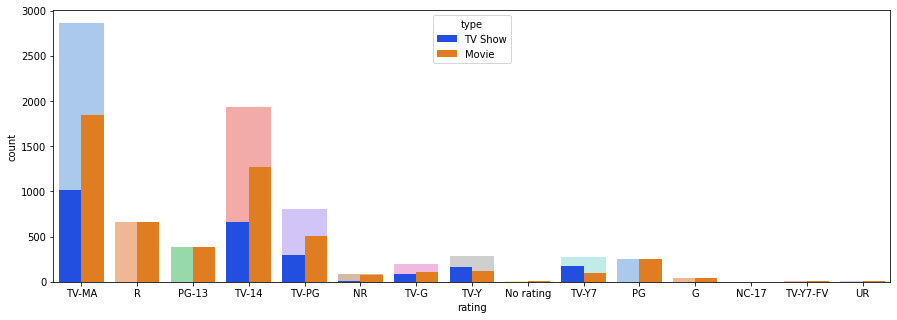

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(df.rating,ax=ax, palette='pastel')

sns.countplot(df.rating, hue=df.type,ax=ax, palette='bright')

In [ ]:
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
movies_df['year_added'] = pd.DatetimeIndex(movies_df['date_added']).year
shows_df['year_added'] = pd.DatetimeIndex(shows_df['date_added']).year
df['month_added'] = pd.DatetimeIndex(df['date_added']).month
movies_df['month_added'] = pd.DatetimeIndex(movies_df['date_added']).month
shows_df['month_added'] = pd.DatetimeIndex(shows_df['date_added']).month

In [ ]:
df.date_added[0]

'August 14, 2020'

In [ ]:
df.date_added = pd.to_datetime(df.date_added)

In [ ]:
# Feauture Extraction
df['yr_date_added']=df.date_added.dt.year

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,yr_date_added
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,2020.0


In [ ]:
df.describe()

,release_year,year_added,month_added,yr_date_added
count,7787.000000,7777.000000,7777.000000,7777.000000
mean,2013.932580,2018.493378,6.783850,2018.493378
std,8.757395,1.388144,3.591608,1.388144
min,1925.000000,2008.000000,1.000000,2008.000000
25%,2013.000000,2018.000000,4.000000,2018.000000
50%,2017.000000,2019.000000,7.000000,2019.000000
75%,2018.000000,2020.000000,10.000000,2020.000000
max,2021.000000,2021.000000,12.000000,2021.000000


In [ ]:
df[df.yr_date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,yr_date_added
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,No Director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN,NaN,NaN
549,s550,TV Show,Anthony Bourdain: Parts Unknown,No Director,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,NaN,NaN,NaN
2263,s2264,TV Show,Frasier,No Director,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,NaN,NaN,NaN
2288,s2289,TV Show,Friends,No Director,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,NaN,NaN,NaN
2555,s2556,TV Show,Gunslinger Girl,No Director,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",NaN,NaN,NaN
3374,s3375,TV Show,Kikoriki,No Director,Igor Dmitriev,No Country,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN,NaN,NaN
3492,s3493,TV Show,La Familia P. Luche,No Director,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN,NaN,NaN
3946,s3947,TV Show,Maron,No Director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN,NaN,NaN
5137,s5138,TV Show,Red vs. Blue,No Director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN,NaN,NaN
6065,s6066,TV Show,The Adventures of Figaro Pho,No Director,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",NaN,NaN,NaN


In [ ]:
df.yr_date_added.fillna(df.release_year,inplace=True)

In [ ]:
df[df.yr_date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,yr_date_added


In [ ]:
df.describe()

,release_year,year_added,month_added,yr_date_added
count,7787.000000,7777.000000,7777.000000,7787.000000
mean,2013.932580,2018.493378,6.783850,2018.484140
std,8.757395,1.388144,3.591608,1.422219
min,1925.000000,2008.000000,1.000000,2003.000000
25%,2013.000000,2018.000000,4.000000,2018.000000
50%,2017.000000,2019.000000,7.000000,2019.000000
75%,2018.000000,2020.000000,10.000000,2020.000000
max,2021.000000,2021.000000,12.000000,2021.000000


In [ ]:
df10=df[df.release_year>2009]

In [ ]:
df10=df10[df10.yr_date_added>2009]

In [ ]:
df10.groupby('release_year').type.value_counts()

release_year  type   
2010          Movie      136
              TV Show     37
2011          Movie      127
              TV Show     39
2012          Movie      158
              TV Show     61
2013          Movie      202
              TV Show     65
2014          Movie      244
              TV Show     90
2015          Movie      382
              TV Show    159
2016          Movie      642
              TV Show    240
2017          Movie      744
              TV Show    268
2018          Movie      734
              TV Show    387
2019          Movie      582
              TV Show    414
2020          TV Show    457
              Movie      411
2021          TV Show     19
              Movie       12
Name: type, dtype: int64

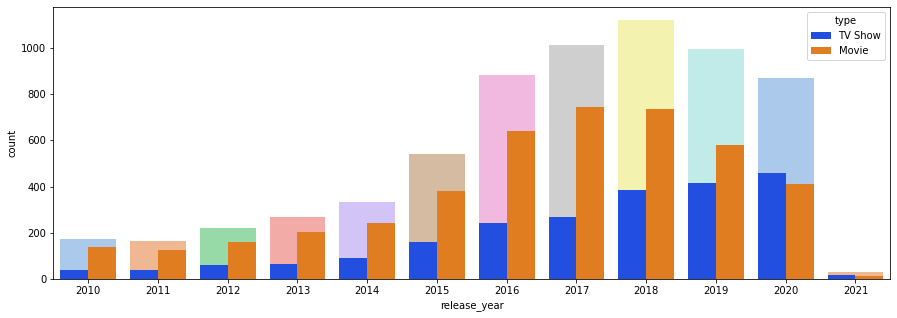

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(df10.release_year,ax=ax, palette='pastel')

sns.countplot(df10.release_year, hue=df10.type,ax=ax, palette='bright')

In [ ]:
df10.groupby('yr_date_added').type.value_counts()

yr_date_added  type   
2010.0         TV Show       1
2011.0         Movie         1
2012.0         Movie         3
               TV Show       1
2013.0         Movie         6
               TV Show       5
2014.0         Movie        18
               TV Show       3
2015.0         Movie        58
               TV Show      25
2016.0         Movie       238
               TV Show     144
2017.0         Movie       780
               TV Show     319
2018.0         Movie      1025
               TV Show     412
2019.0         Movie      1140
               TV Show     635
2020.0         Movie      1057
               TV Show     662
2021.0         Movie        48
               TV Show      29
Name: type, dtype: int64

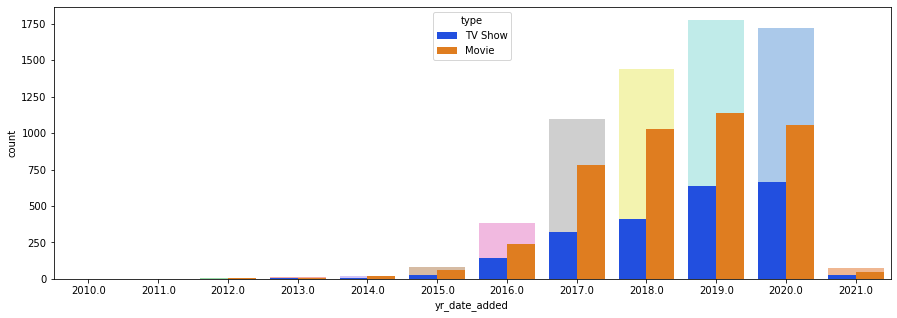

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(df10.yr_date_added,ax=ax, palette='pastel')

sns.countplot(df10.yr_date_added, hue=df10.type,ax=ax, palette='bright')

In [ ]:
df10['combined_text'] = df10['description']+df10['listed_in']+df10['rating']+df10['director']+df10['cast']+df10['country']

In [ ]:
import re

In [ ]:
# function to change data to lowercase and perform pattern change
def textpattern(text):
  return re.sub(r"[^a-zA-Z ]","",str(text)).lower()

In [ ]:
# converting to lower case and basic pattern change to clean data

df10['combined_text'] = df10['combined_text'].apply(textpattern)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# stop words

stemmer = SnowballStemmer('english')
stopwords = set(stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
# function to perform stemming of the words and remove stop words

def filter(text, stopwords):
    cleaned = []
    tokens = word_tokenize(text) 
    for word in tokens:
        if word not in stopwords:
            cleaned.append(stemmer.stem(word))
    return " ".join(cleaned)
cleaned_text = []
for row in df10.iterrows():
    cleaned_text.append(filter(row[1]['combined_text'],stopwords))
  
cleaned_text[0]

'futur elit inhabit island paradis far crowd slum get one chanc join save squalorintern tv show tv drama tv scifi fantasytvmano directorjoo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschibrazil'

In [ ]:
# cleaned data
filtered_text = pd.Series(cleaned_text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#using tfidf transforming data

tfidf = TfidfVectorizer(max_df = 0.9,min_df = 1,max_features=12000)
x= tfidf.fit_transform(filtered_text)

In [ ]:
x

<6610x12000 sparse matrix of type '<class 'numpy.float64'>'
	with 164473 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn import mixture
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
import matplotlib.cm as cm


In [ ]:
# using PCA to project data to lower dimensional space

pca = PCA(random_state=42)
pca.fit(x.toarray())

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

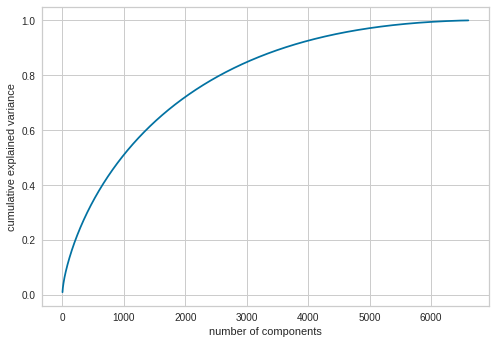

In [ ]:
# Explained variance for different number of components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# applying PCA to transform the data into 4000 components selected by checking the above graph . explained variance for 4000 components is around 0.9

pca = PCA(n_components=4000,random_state=42)
pca.fit(x.toarray())
transformed_data = pca.fit_transform(x.toarray())
transformed_data.shape

(6610, 4000)

In [ ]:
#data transformed 

transformed_data

array([[ 1.39700454e-01, -2.38873992e-02, -3.48375684e-02, ...,
        -8.31912185e-03,  1.46477613e-03, -1.95505634e-03],
       [-4.96769408e-02, -1.58815476e-02,  1.70303191e-02, ...,
         2.19311108e-03,  1.28055092e-03, -9.63133516e-03],
       [-4.57999929e-02, -5.99169684e-02,  6.95006109e-03, ...,
        -5.19736853e-03,  1.10731460e-02,  1.75235585e-03],
       ...,
       [-7.02319405e-02,  1.82998356e-02,  1.02147169e-01, ...,
         7.69200656e-03, -9.75926638e-03, -2.02496902e-04],
       [ 6.31305696e-02,  4.09853006e-02,  1.20832408e-02, ...,
         7.05173047e-03,  5.64342734e-03,  2.59001546e-03],
       [-8.52984922e-02,  2.55999832e-01,  6.92280852e-02, ...,
         7.24179117e-03, -9.12190065e-03,  1.46144385e-03]])

K Means Clustering

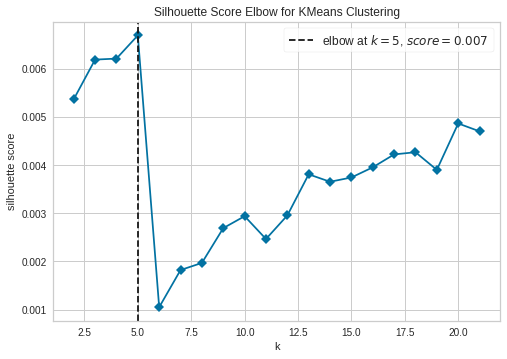

In [ ]:
# finding optimal number of clusters for K Means

# Instantiate the clustering model and visualizer
model = KMeans(tol=1e-4,random_state = 42)
visualizer = KElbowVisualizer(model, k=(2,22), metric='silhouette', timings=False)

visualizer.fit(transformed_data)
visualizer.show()  

In [ ]:
# fitting kmeans to transformed data

kmeans= KMeans(n_clusters=5,max_iter=1000,tol=1e-4, n_init=1,random_state= 42)
kmeans.fit(transformed_data)

KMeans(max_iter=1000, n_clusters=5, n_init=1, random_state=42)

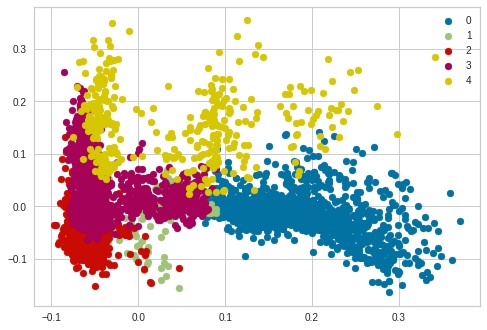

In [ ]:
# plotting clusters

label = kmeans.fit_predict(transformed_data)
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(transformed_data[label == i , 0] , transformed_data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# created new column with cluster number

df10['cluster'] = kmeans.labels_

In [ ]:
df10.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,yr_date_added,combined_text,cluster
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,2020.0,in a future where the elite inhabit an island ...,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,2016.0,after a devastating earthquake hits mexico cit...,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,2018.0,when an army recruit is found dead his fellow ...,2
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0,7.0,2017.0,a genetics professor experiments with a treatm...,0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020.0,6.0,2020.0,after an awful accident a couple admitted to a...,1


In [ ]:
# value count for different clusters

df10.cluster.value_counts()

3    2648
2    1226
0    1197
1    1181
4     358
Name: cluster, dtype: int64

Text(0, 0.5, 'size')

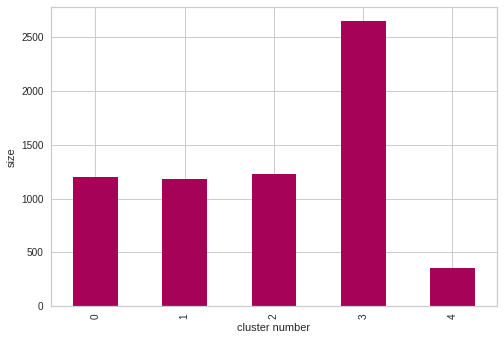

In [ ]:
# Size of clusters formed

df10.cluster.value_counts().sort_index().plot(kind='bar', color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

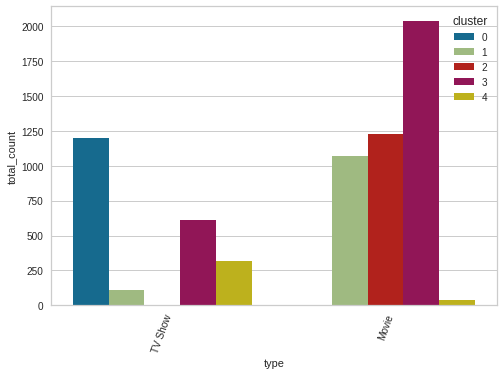

In [ ]:
# plotting content type count for diferent clusters

def cluster_analysis(df,col_name):
  df1 = df.groupby(['cluster',col_name]).agg(total_count=(col_name,'count'))
  df1 = df1.reset_index()
  sns.barplot(x=col_name,y="total_count", hue="cluster",data=df1)
  plt.xticks(rotation=70)
 
cluster_analysis(df10,'type')

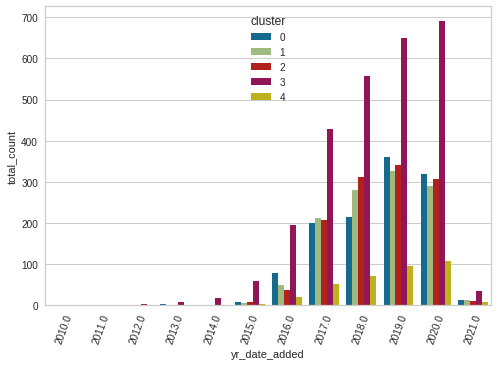

In [ ]:
# plotting bar plot for analyzing the the year when content was added to netflix for different clusters

cluster_analysis(df10,'yr_date_added')

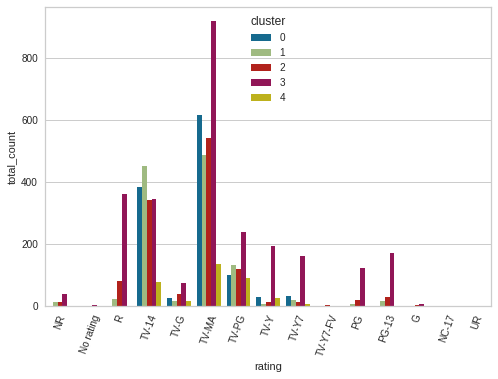

In [ ]:
# rating wise cluster analysis

cluster_analysis(df10,'rating')

In [ ]:
from wordcloud import WordCloud

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df10.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()